In [1]:
import os,sys
sys.path.append('/w/jam-sciwork24/prokudin/jam3d_dev_lib')
sys.path.append('/w/jam-sciwork24/prokudin/jam3dlib')
os.environ["JAM3D"] = "/w/jam-sciwork24/prokudin/jam3d_dev_lib"
from tools.tools     import checkdir,save,load,lprint
import tools.config
from tools.config    import load_config, conf
import numpy as np
from tmd import TMD
import matplotlib as plt
import pylab as py
import pandas as pd

In [4]:
cd '/w/jam-sciwork24/prokudin/jam3dlib'

/w/jam-sciwork24/prokudin/jam3dlib


In [15]:
mypath = '/w/jam-sciwork24/prokudin/PSU_PHYS496/AI/gan'

In [5]:
tag='JAM3D_2022' #tag for a given analysis (see "List of Fits")
tmd=TMD(tag)

parman: pdf
order: [1, 'pdf', 'widths1_uv']
order: [1, 'pdf', 'widths1_sea']
parman: pdfpi-
parman: ffpi
order: [1, 'ffpi', 'widths1_fav']
order: [1, 'ffpi', 'widths1_ufav']
parman: ffk
order: [1, 'ffk', 'widths1_fav']
order: [1, 'ffk', 'widths1_ufav']
parman: ffh
parman: transversity
order: [1, 'transversity', 'widths1_uv']
order: [1, 'transversity', 'u N0 1']
order: [1, 'transversity', 'u N1 1']
order: [1, 'transversity', 'u a0 1']
order: [1, 'transversity', 'u b0 1']
order: [1, 'transversity', 'u b1 1']
order: [1, 'transversity', 'd N0 1']
order: [1, 'transversity', 'd N1 1']
order: [1, 'transversity', 'd a0 1']
parman: collinspi
order: [1, 'collinspi', 'widths1_fav']
order: [1, 'collinspi', 'widths1_ufav']
order: [1, 'collinspi', 'u N0 1']
order: [1, 'collinspi', 'u N1 1']
order: [1, 'collinspi', 'u a0 1']
order: [1, 'collinspi', 'u a1 1']
order: [1, 'collinspi', 'u b0 1']
order: [1, 'collinspi', 'u b1 1']
order: [1, 'collinspi', 'u b0 2']
order: [1, 'collinspi', 'u b1 2']
order: [

In [6]:
M = 0.93891897
Mpi = 0.135

In [7]:
#icol=False will give the full TMD while icol=True will return only the collinear part: see Eqs. (3)-(7) of arXiv:2002.08384
#The 5th argument in tmd.eval is the hadron (p: proton, pi: pion)
#The 6th argument in tmd.eval is the replica index (0 is chosen in this case). You can get the number of replicas via tmd.nrep.
#11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

x=0.1
Q2=10.0
kT=0.1
print(tmd.eval(x,Q2,kT,'p','pdf',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','sivers',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','sivers',0,icol=True))

[7.84175357e+00 3.64503757e+00 5.69564180e-01 2.52804796e+00
 7.06690597e-01 3.31212163e-01 3.31212163e-01 1.26601743e-01
 1.26601743e-01 1.61433295e-04 1.61433295e-04]
[ 0.         -0.54450382  0.          0.87315847  0.          0.
  0.          0.          0.          0.          0.        ]
[ 0.         -0.21872618  0.          0.35074615  0.          0.
  0.          0.          0.          0.          0.        ]


In [8]:
tmd.nrep

465

In [10]:
x=0.1
Q2=10.0
kT=0.1
irep = 0 # this one can be varied in order to create multiple images
def plot_function_u(irep,x,Q2,kTx,kTy):
    kT = np.sqrt(kTx**2 + kTy**2)
    return tmd.eval(x,Q2,kT,'p','pdf',irep,icol=False)[1] - kTx/M * tmd.eval(x,Q2,kT,'p','sivers',irep,icol=False)[1]
kTx,kTy = 0.1,0.1
print(plot_function_u(irep,x,Q2,kTx,kTy))

3.6289312352484524


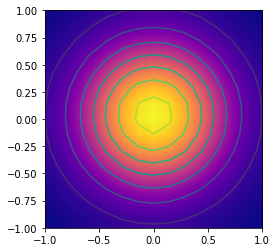

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
import matplotlib.cm as cm

kTx = np.linspace(-1,1,15)
kTy = np.linspace(-1,1,15)
X, Y = np.meshgrid(kTx, kTy)

Z=[]
x = 0.1
Q2 = 10

irep = 0 # this can be changed to produce replicas of images, can be from 0 to 465
for kx in kTx:
    Z1 = []
    for ky in kTy:
        Z1.append(plot_function_u(irep,x,Q2,kx,ky))
    Z.append(Z1)
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=cm.plasma, extent=(-1, 1, -1, 1))
CS = ax.contour(X, Y, Z)


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Initialize variables
kTx = np.linspace(-1, 1, 15)
kTy = np.linspace(-1, 1, 15)
x = 0.1
Q2 = 10
num_replicas = 465  # Total replicas

# Create a directory for images
os.makedirs(mypath+'/images', exist_ok=True)

# Generate and save images
for irep in range(num_replicas):
    X, Y = np.meshgrid(kTx, kTy)
    Z = []

    lprint('progress: %s/%s'%(irep,num_replicas)) # monitor the progress

    for kx in kTx:
        Z1 = []
        for ky in kTy:
            Z1.append(plot_function_u(irep, x, Q2, kx, ky))
        Z.append(Z1)

    # Create the image
    fig, ax = plt.subplots()
    im = ax.imshow(Z, interpolation='bilinear', origin='lower', cmap='plasma', extent=(-1, 1, -1, 1))
    ax.contour(X, Y, Z)
    plt.axis('off')  # Hide the axes

    # Save the figure
    plt.savefig(mypath+f'/images/Z_matrix_replica_{irep}.jpeg', format='jpeg', bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Close the figure to free up memory

print("All images have been generated and saved.")

progress: 464/465All images have been generated and saved.


In [18]:
import zipfile

# Create a zip file for all the images
zip_path = mypath+'/images_replicas.zip'
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for foldername, subfolders, filenames in os.walk('images'):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)  # Complete path to file
            zipf.write(file_path, os.path.relpath(os.path.join(foldername, filename), 'images'))

print("JPEG files have been successfully zipped.")


JPEG files have been successfully zipped.


In [20]:
import numpy as np
import os
import zipfile

# Define parameters
num_replicas = 466  # Adjust this as needed, up to 465
kTx = np.linspace(-1, 1, 15)
kTy = np.linspace(-1, 1, 15)
x = 0.1
Q2 = 10

# Temporary folder for storing files
os.makedirs(mypath+'/temp_data', exist_ok=True)

# Generate and save Z matrices for each replica
for irep in range(num_replicas):
    Z = []
    for kx in kTx:
        Z1 = []
        for ky in kTy:
            Z1.append(np.sin(kx) * np.cos(ky))  # Example function for demonstration
        Z.append(Z1)

    # Save the matrix to a file in the temporary directory
    np.save(mypath+f'/temp_data/Z_matrix_replica_{irep}.npy', Z)

# Zip all files
zip_path = mypath+'data_replicas.zip'
with zipfile.ZipFile(zip_path, 'w') as zipf:
    # Loop over the files in the directory
    for foldername, subfolders, filenames in os.walk('temp_data'):
        for filename in filenames:
            # Create a complete filepath of file in directory
            file_path = os.path.join(foldername, filename)
            # Add file to zip
            zipf.write(file_path, os.path.relpath(os.path.join(foldername, filename), mypath+'/temp_data'))

print("Files have been successfully zipped.")




Files have been successfully zipped.
